<a href="https://colab.research.google.com/github/vortexash/BI-machine-learning/blob/master/K-means.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
print(os.listdir("../input"))

# Any results you write to the current directory are saved as output.

[]


In [0]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
names = ['sepal-length', 'sepal-width', 'petal-length', 'petal-width', 'class']  # column names
d_iris_orig = pd.read_csv(url, names=names)   # read using pandas

In [0]:
d_iris_orig

,sepal-length,sepal-width,petal-length,petal-width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
5,5.4,3.9,1.7,0.4,Iris-setosa
6,4.6,3.4,1.4,0.3,Iris-setosa
7,5.0,3.4,1.5,0.2,Iris-setosa
8,4.4,2.9,1.4,0.2,Iris-setosa
9,4.9,3.1,1.5,0.1,Iris-setosa


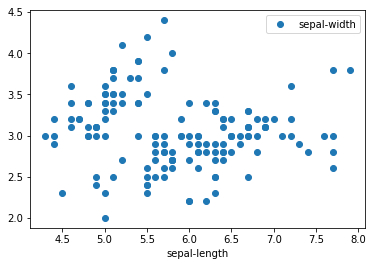

In [0]:
d_iris_orig.plot(x='sepal-length', y='sepal-width', style='o')

In [0]:
import seaborn as sns
import matplotlib.pyplot as plt

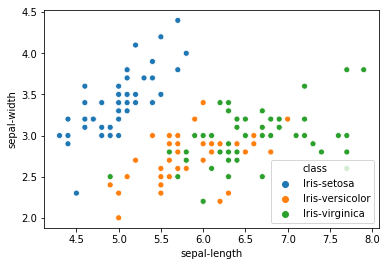

In [0]:
sns.scatterplot(x='sepal-length', y='sepal-width', hue='class', data=d_iris_orig)

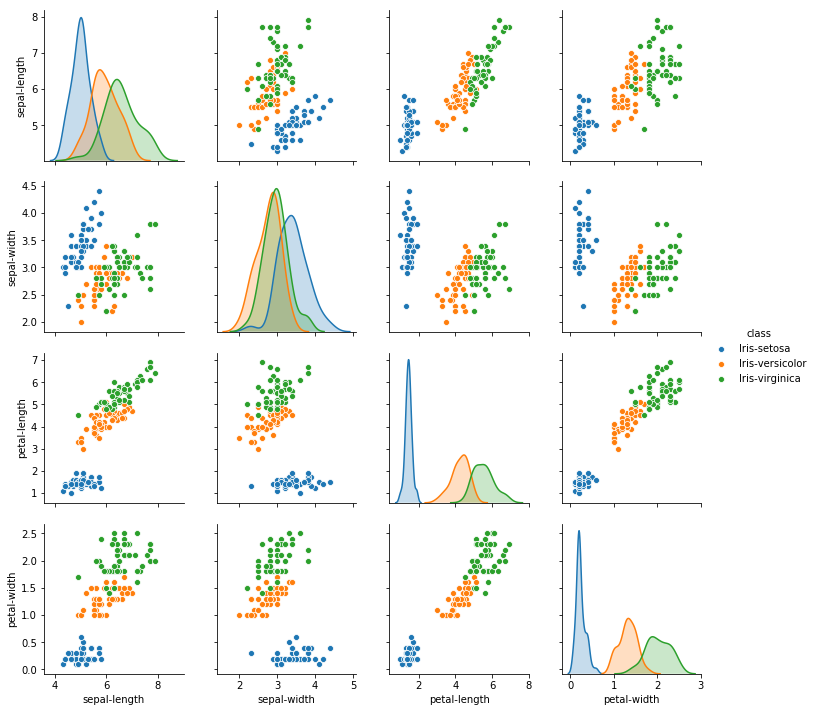

In [0]:
sns.pairplot(hue='class', data=d_iris_orig)

In [0]:
d_iris_orig_unsupervised = d_iris_orig.drop('class', axis=1)
d_iris_orig_unsupervised

,sepal-length,sepal-width,petal-length,petal-width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
5,5.4,3.9,1.7,0.4
6,4.6,3.4,1.4,0.3
7,5.0,3.4,1.5,0.2
8,4.4,2.9,1.4,0.2
9,4.9,3.1,1.5,0.1


In [0]:
iris_unsupervised_array = d_iris_orig_unsupervised.values
iris_unsupervised_array

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [0]:
K = 3
import random
centroids = [random.choice(iris_unsupervised_array) for i in range(K)]
centroids

[array([5.4, 3.9, 1.7, 0.4]),
 array([6.9, 3.2, 5.7, 2.3]),
 array([5.4, 3.9, 1.3, 0.4])]

In [0]:
from scipy.spatial.distance import euclidean

In [0]:
# clusters = {0:[], 1:[], 2: []}
def assign_clusters(iris_unsupervised_array, centroids):
    clusters = {i:[] for i in range(len(centroids))}  # Initilaisin CLusters
    for flower in iris_unsupervised_array: # Iterating Dataset for each flower
        min_distance = 999999 # Initialising minmum distance
        centroid = -1 # Initialising closest centroid
        for i,c in enumerate(centroids): # Iterating though centroid
            distance = euclidean(flower, c) # Finding distance
            if distance < min_distance: # Checking which is smaller
                centroid = i # Assign centroid if smaller
                min_distance = distance # Setting minimum distance
        # or 
    #     centroid = np.argmin([euclidean(flower, c) for c in centroids])     
        clusters[centroid].append(flower)
    return clusters

clusters = assign_clusters(iris_unsupervised_array, centroids)
clusters

{0: [array([4.6, 3.1, 1.5, 0.2]),
  array([5.4, 3.9, 1.7, 0.4]),
  array([5. , 3.4, 1.5, 0.2]),
  array([4.9, 3.1, 1.5, 0.1]),
  array([5.4, 3.7, 1.5, 0.2]),
  array([4.8, 3.4, 1.6, 0.2]),
  array([5.7, 4.4, 1.5, 0.4]),
  array([5.7, 3.8, 1.7, 0.3]),
  array([5.1, 3.8, 1.5, 0.3]),
  array([5.4, 3.4, 1.7, 0.2]),
  array([5.1, 3.7, 1.5, 0.4]),
  array([5.1, 3.3, 1.7, 0.5]),
  array([4.8, 3.4, 1.9, 0.2]),
  array([5. , 3. , 1.6, 0.2]),
  array([5. , 3.4, 1.6, 0.4]),
  array([5.2, 3.5, 1.5, 0.2]),
  array([4.7, 3.2, 1.6, 0.2]),
  array([4.8, 3.1, 1.6, 0.2]),
  array([5.4, 3.4, 1.5, 0.4]),
  array([5.2, 4.1, 1.5, 0.1]),
  array([4.9, 3.1, 1.5, 0.1]),
  array([4.9, 3.1, 1.5, 0.1]),
  array([5.1, 3.4, 1.5, 0.2]),
  array([5. , 3.5, 1.6, 0.6]),
  array([5.1, 3.8, 1.9, 0.4]),
  array([5.1, 3.8, 1.6, 0.2]),
  array([5.3, 3.7, 1.5, 0.2]),
  array([4.9, 2.4, 3.3, 1. ]),
  array([5. , 2. , 3.5, 1. ]),
  array([5.6, 2.9, 3.6, 1.3]),
  array([5.7, 2.6, 3.5, 1. ]),
  array([5.5, 2.4, 3.8, 1.1]),
  arr

In [0]:
def get_next_centroids(clusters):
    new_centroids = [] # Initialise New Centroids
    for centroid in clusters: # Iterating thought each cluster
        new_centroids.append(np.array(clusters[centroid]).mean(axis=0)) # Finding the centroid. In numpy this is very easy, 
        # mean with axis=0 will take the mean of every column
    return new_centroids
reset_centroids(clusters)

[array([5.14285714, 3.25714286, 2.01428571, 0.44571429]),
 array([6.34673913, 2.90978261, 5.03152174, 1.72934783]),
 array([4.89565217, 3.32173913, 1.32173913, 0.22173913])]

In [0]:
def step_K_means(iris_unsupervised_array, centroids):
    clusters = assign_clusters(iris_unsupervised_array, centroids)
    return get_next_centroids(clusters)
step_K_means(iris_unsupervised_array, centroids)

[array([5.14285714, 3.25714286, 2.01428571, 0.44571429]),
 array([6.34673913, 2.90978261, 5.03152174, 1.72934783]),
 array([4.89565217, 3.32173913, 1.32173913, 0.22173913])]

In [0]:
from tqdm import tqdm
def K_means(iris_unsupervised_array, K, max_steps=10):
    centroids = [random.choice(iris_unsupervised_array) for i in range(K)] # Initialise Centroids
    for step in tqdm(range(max_steps)):
        centroids = step_K_means(iris_unsupervised_array, centroids)
    return centroids

In [0]:
final_centroids = K_means(iris_unsupervised_array, 3, 5000)
final_centroids

100%|██████████| 5000/5000 [00:46<00:00, 108.17it/s]


[array([6.85      , 3.07368421, 5.74210526, 2.07105263]),
 array([5.9016129 , 2.7483871 , 4.39354839, 1.43387097]),
 array([5.006, 3.418, 1.464, 0.244])]

In [0]:
def get_cluster(flower):
    return np.argmin([euclidean(flower, c) for c in final_centroids])   

In [0]:
d_iris_orig_unsupervised = d_iris_orig_unsupervised.drop('cluster', axis=1)

In [0]:
d_iris_orig_unsupervised['cluster'] = d_iris_orig_unsupervised.apply(get_cluster, axis=1)
d_iris_orig_unsupervised

,sepal-length,sepal-width,petal-length,petal-width,cluster
0,5.1,3.5,1.4,0.2,2
1,4.9,3.0,1.4,0.2,2
2,4.7,3.2,1.3,0.2,2
3,4.6,3.1,1.5,0.2,2
4,5.0,3.6,1.4,0.2,2
5,5.4,3.9,1.7,0.4,2
6,4.6,3.4,1.4,0.3,2
7,5.0,3.4,1.5,0.2,2
8,4.4,2.9,1.4,0.2,2
9,4.9,3.1,1.5,0.1,2


In [0]:
d_iris_orig_unsupervised

,sepal-length,sepal-width,petal-length,petal-width,cluster
0,5.1,3.5,1.4,0.2,2
1,4.9,3.0,1.4,0.2,1
2,4.7,3.2,1.3,0.2,1
3,4.6,3.1,1.5,0.2,1
4,5.0,3.6,1.4,0.2,2
5,5.4,3.9,1.7,0.4,2
6,4.6,3.4,1.4,0.3,2
7,5.0,3.4,1.5,0.2,2
8,4.4,2.9,1.4,0.2,1
9,4.9,3.1,1.5,0.1,1


In [0]:
from sklearn.cluster import KMeans
kmeans = KMeans(3).fit(iris_unsupervised_array)
kmeans

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [0]:
kmeans.cluster_centers_

array([[5.006     , 3.418     , 1.464     , 0.244     ],
       [5.9016129 , 2.7483871 , 4.39354839, 1.43387097],
       [6.85      , 3.07368421, 5.74210526, 2.07105263]])

In [0]:
final_centroids

[array([6.85      , 3.07368421, 5.74210526, 2.07105263]),
 array([5.9016129 , 2.7483871 , 4.39354839, 1.43387097]),
 array([5.006, 3.418, 1.464, 0.244])]